# Normalize and Visualize Count Tables

We want to manually normalize our count table with TPM and RPKM normalization.\
Since we must not compare samples of different conditions with those methods we will use only our TNF samples for the analysis.\
\
Afterward we will create a plot to examine our normalized count data and find out what we can use them for.


In [24]:
%matplotlib  inline

# import neccessary python packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

### Task1: Import count table
You find the TNF count table in `/Data/RNAseq/RNA_Scr_feature_counts.tsv`. \
Import the file as a pandas DataFrame. Find out via Google how you can skip the first row of our file (the row starting with `#`). 

In [2]:
## read feature counts table as pandas dataframe

fp_counts = '/Data/RNAseq/RNA_Scr_feature_counts.tsv'

# either:
if False:
    counts_df = pd.read_csv(fp_counts, sep="\t", skiprows=1)
else:
# or:
    counts_df = pd.read_csv(fp_counts, sep="\t", comment='#')

In [3]:
counts_df

,Geneid,Chr,Start,End,Strand,Length,no_backup/Generated/RNAseq/RNA_Scr_V1_hisat2_spliced.sorted.bam,no_backup/Generated/RNAseq/RNA_Scr_V2_hisat2_spliced.sorted.bam,no_backup/Generated/RNAseq/RNA_Scr_V3_hisat2_spliced.sorted.bam,no_backup/Generated/RNAseq/RNA_Scr_T1_hisat2_spliced.sorted.bam,no_backup/Generated/RNAseq/RNA_Scr_T2_hisat2_spliced.sorted.bam,no_backup/Generated/RNAseq/RNA_Scr_T3_hisat2_spliced.sorted.bam
0,TRNP,chrMT,15956,16023,-,68,0,0,0,0,0,0
1,TRNT,chrMT,15888,15953,+,66,0,0,0,0,0,0
2,CYTB,chrMT,14747,15887,+,1141,0,0,0,0,0,0
3,TRNE,chrMT,14674,14742,-,69,0,0,0,0,0,0
4,ND6,chrMT,14149,14673,-,525,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43677,FAM138A,chr1;chr1;chr1,34611;35277;35721,35174;35481;36081,-;-;-,1130,0,1,0,1,0,1
43678,MIR1302-2,chr1,30366,30503,+,138,0,0,0,1,0,0
43679,MIR6859-1,chr1,17369,17436,-,68,5,8,6,6,2,7
43680,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,229,310,218,225,190,158


## Task2: Rename the sample column names
Our samples are currently named e.g. `mapping/RNAseq_shScr_TNF1_srt.bam`. This is a rather long string and we want to change that. \
Find out how to rename columns of a pandas DataFrame and think of a more convenient name for our samples.

In [4]:
# rename sample column names for convenience
counts_df.columns = list(map(lambda x: x if 'RNA_Scr_' not in x else x.split('/')[-1].split('_')[2], counts_df.columns))
counts_df

,Geneid,Chr,Start,End,Strand,Length,V1,V2,V3,T1,T2,T3
0,TRNP,chrMT,15956,16023,-,68,0,0,0,0,0,0
1,TRNT,chrMT,15888,15953,+,66,0,0,0,0,0,0
2,CYTB,chrMT,14747,15887,+,1141,0,0,0,0,0,0
3,TRNE,chrMT,14674,14742,-,69,0,0,0,0,0,0
4,ND6,chrMT,14149,14673,-,525,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43677,FAM138A,chr1;chr1;chr1,34611;35277;35721,35174;35481;36081,-;-;-,1130,0,1,0,1,0,1
43678,MIR1302-2,chr1,30366,30503,+,138,0,0,0,1,0,0
43679,MIR6859-1,chr1,17369,17436,-,68,5,8,6,6,2,7
43680,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,229,310,218,225,190,158


## Task3: Extract count value columns
For both TPM and RKPM we only normalize the count data of our samples. Especially, only for samples of the same condition, i.e. biological replicates. Here we only take the TNF samples 1, 2 and 3 (but not the vehicle samples 1, 2 and 4)! \
Extract those columns and save them in a seperate pandas DataFrame. \
The result should be a DataFrame with three columns (TNF1-3).

In [5]:
# build subset with only the counted features for normalization
#tnf_counts_df = tnf_df.iloc[:, 6:]
tnf_counts_df = counts_df[['T1', 'T2', 'T3']]

In [6]:
tnf_counts_df

,T1,T2,T3
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
43677,1,0,1
43678,1,0,0
43679,6,2,7
43680,225,190,158


## Task4: Extract `Length` column
For both TPM and RKPM we need the information about the gene length of all the genes. \
Extract the column named `Length` and save it in a seperate pandas DataFrame.

In [7]:
# extract gene length column
tnf_gene_length = counts_df.iloc[:, 5]

In [8]:
tnf_gene_length

0          68
1          66
2        1141
3          69
4         525
         ... 
43677    1130
43678     138
43679      68
43680    1769
43681    1652
Name: Length, Length: 43682, dtype: int64

# Normalization
We can begin with the normalization of our samples.\
For this purpose we will use the DataFrame of our samples as well as the DataFrame containing the informaiton about the gene lengths.

## Task5: TPM normalization

To execute the TPM normalization, use the following formula: \
<span style="color:red">**10^6 * (count value / gene length) / sum(count value / gene length)**</span> \
\
Save the intermediate results in their own DataFrames if neccessary. \
At the end, combine the TPM normalized count values with the first six columns of our original count data (Columns `Geneid` up to `Length`).\
The result should be a DataFrame looking like the `TNF_counts.tsv`, only now with normalized counts.

In [9]:
# count value divided by gene length
counts_per_base = tnf_counts_df.divide(tnf_gene_length, axis=0)

# sum of count values divided by gene length
counts_per_base_sums = counts_per_base.sum(axis=0, numeric_only=True)

# calculate tpm values
tnf_tpm_values = (counts_per_base * 10**6).divide(counts_per_base_sums, axis=1)

# combine new tpm values with rest of the count table columns
tnf_tpm = pd.concat([counts_df.iloc[:,:6], tnf_tpm_values], axis=1)

In [10]:
tnf_tpm

,Geneid,Chr,Start,End,Strand,Length,T1,T2,T3
0,TRNP,chrMT,15956,16023,-,68,0.000000,0.000000,0.000000
1,TRNT,chrMT,15888,15953,+,66,0.000000,0.000000,0.000000
2,CYTB,chrMT,14747,15887,+,1141,0.000000,0.000000,0.000000
3,TRNE,chrMT,14674,14742,-,69,0.000000,0.000000,0.000000
4,ND6,chrMT,14149,14673,-,525,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
43677,FAM138A,chr1;chr1;chr1,34611;35277;35721,35174;35481;36081,-;-;-,1130,0.003967,0.000000,0.007323
43678,MIR1302-2,chr1,30366,30503,+,138,0.032485,0.000000,0.000000
43679,MIR6859-1,chr1,17369,17436,-,68,0.395552,0.432623,0.851853
43680,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,0.570185,1.579844,0.739103


## Task6: RPKM normalization

To execute the RPKM normalization, use the following formula: \
<span style="color:red">**(10^9 * count value) / (sum(count value) * gene length) = ((10^9 * count value) / sum(count value)) / gene length**</span> \
\
Save the intermediate results in their own DataFrames if neccessary. \
At the end, combine the RPKM normalized count values with the first six columns of our original count data (Columns `Geneid` up to `Length`).\
The result should be a DataFrame looking like the `TNF_counts.tsv`, only now with normalized counts.



In [11]:
# sum of count values
count_sums = tnf_counts_df.sum(axis=0, numeric_only=True)

# calculate rpkm values
tnf_rpkm_values = (tnf_counts_df*1000000000).divide(count_sums, axis=1).divide(tnf_gene_length, axis=0)

# combine new rpkm values with rest of the count table columns
tnf_rpkm = pd.concat([counts_df.iloc[:,:6], tnf_rpkm_values], axis=1)

In [12]:
tnf_rpkm

,Geneid,Chr,Start,End,Strand,Length,T1,T2,T3
0,TRNP,chrMT,15956,16023,-,68,0.000000,0.000000,0.000000
1,TRNT,chrMT,15888,15953,+,66,0.000000,0.000000,0.000000
2,CYTB,chrMT,14747,15887,+,1141,0.000000,0.000000,0.000000
3,TRNE,chrMT,14674,14742,-,69,0.000000,0.000000,0.000000
4,ND6,chrMT,14149,14673,-,525,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
43677,FAM138A,chr1;chr1;chr1,34611;35277;35721,35174;35481;36081,-;-;-,1130,0.012475,0.000000,0.020972
43678,MIR1302-2,chr1,30366,30503,+,138,0.102148,0.000000,0.000000
43679,MIR6859-1,chr1,17369,17436,-,68,1.243807,1.064956,2.439538
43680,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,1.792938,3.888987,2.116643


## Task7: Export normalized count tables as a tsv file
Normally, we want to keep using our normalized count tables for further analyses. \
Therefore, save both your normalized DataFrames as a tsv file.

In [13]:
tnf_tpm.to_csv("TNF_tpm.tsv", sep='\t')
tnf_rpkm.to_csv("TNF_rpkm.tsv", sep='\t')

## Task8: Combine both dataframes for visualization purposes
To properly visualize (and compare) both normalization methods, we need to combine both DataFrames. \
<span style="color:red">Note, that you have to rename the columns again (e.g. `T1` needs to be renamed to `TPM_T1` and `RPKM_T1`).</span> \
As a result you should have a DataFrame with six columns (`TPM_T1-3` and `RPKM_T1-3`).

In [14]:
def prefix_columns(df, prefix='TMP'):
    return df.rename(columns={s: '%s_%s' % (prefix, s) for s in df.columns})

tnf_norm = pd.concat([prefix_columns(tnf_tpm_values, 'TMP'), 
                      prefix_columns(tnf_rpkm_values, 'RPKM')], axis=1,join='inner')

In [15]:
tnf_norm

,TMP_T1,TMP_T2,TMP_T3,RPKM_T1,RPKM_T2,RPKM_T3
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
43677,0.003967,0.000000,0.007323,0.012475,0.000000,0.020972
43678,0.032485,0.000000,0.000000,0.102148,0.000000,0.000000
43679,0.395552,0.432623,0.851853,1.243807,1.064956,2.439538
43680,0.570185,1.579844,0.739103,1.792938,3.888987,2.116643


In [16]:
# or if you want to use merge instead of concat:
tnf_norm2 = pd.merge(prefix_columns(tnf_tpm_values, 'TPM'), 
                     prefix_columns(tnf_rpkm_values, 'RPKM'), how='left', left_index=True, right_index=True)
tnf_norm2

,TPM_T1,TPM_T2,TPM_T3,RPKM_T1,RPKM_T2,RPKM_T3
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...
43677,0.003967,0.000000,0.007323,0.012475,0.000000,0.020972
43678,0.032485,0.000000,0.000000,0.102148,0.000000,0.000000
43679,0.395552,0.432623,0.851853,1.243807,1.064956,2.439538
43680,0.570185,1.579844,0.739103,1.792938,3.888987,2.116643


## Task9: Inspect TPM vs. RPKM
Calculate the sum of all columns with the following function: \
`dataframe.apply(sum)` \
Instead of `dataframe` insert the name of your combined DataFrame from Task8. \
Explain what you see! 

In [17]:
tnf_norm.apply(sum)

TMP_T1     1.000000e+06
TMP_T2     1.000000e+06
TMP_T3     1.000000e+06
RPKM_T1    3.144486e+06
RPKM_T2    2.461627e+06
RPKM_T3    2.863801e+06
dtype: float64

# Visualization
We will now visualize our normalized data to see the difference between TPM and RPKM - and why we should prefer one over the other.\
Therefore, we will create six histograms with seaborn of our normalized samples.

Look at the last three bars of each plot. Use your observations to explain why RPKM should not be used to compare genes of different samples. 

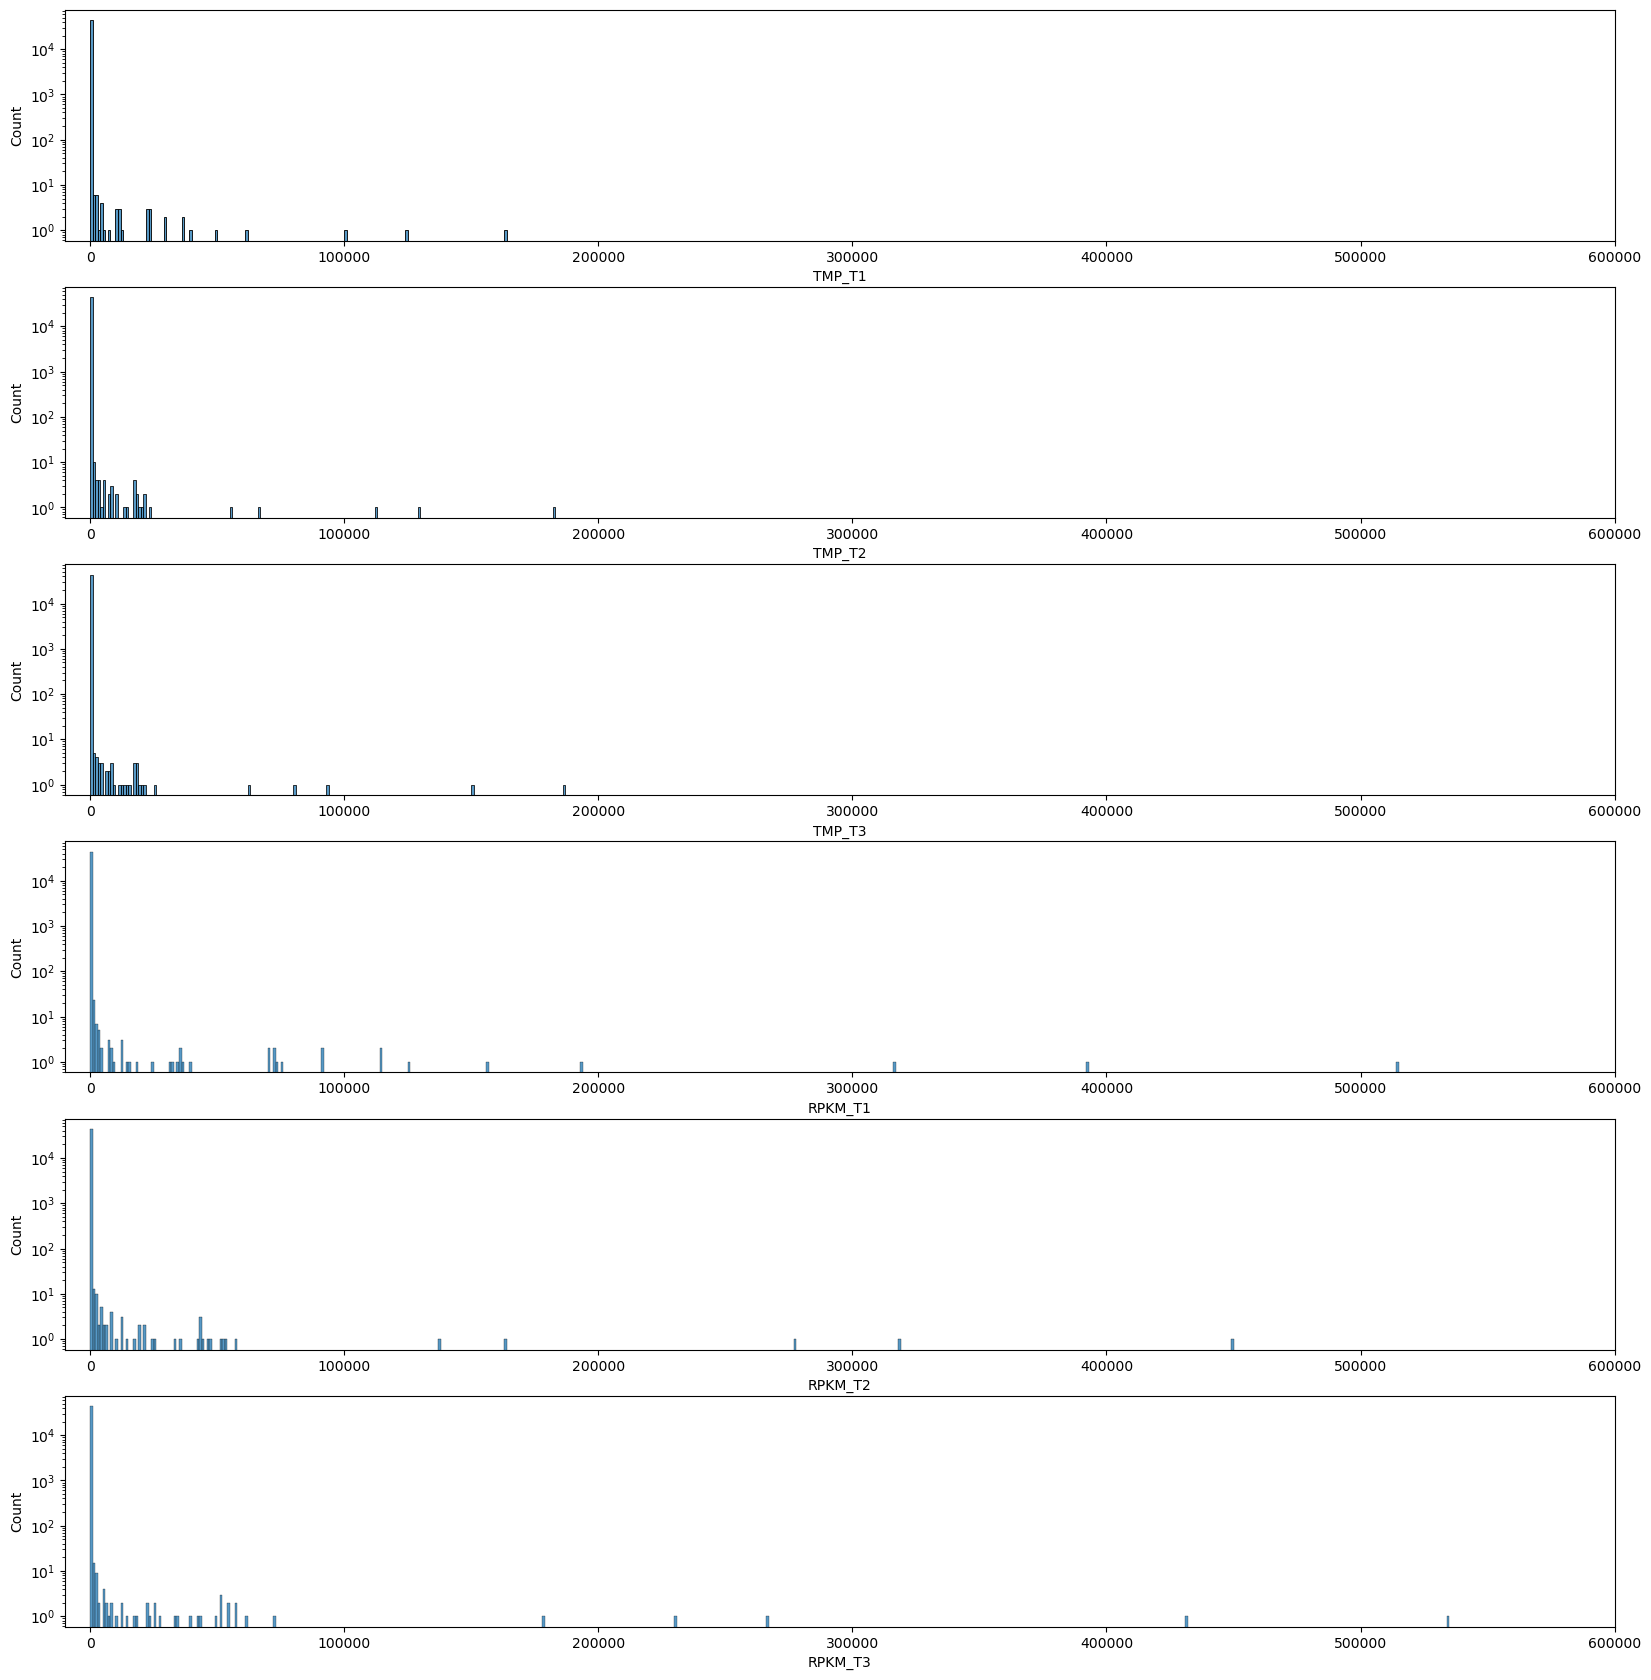

In [18]:
df = tnf_norm  # could also be tnf_norm2

fig, axes = plt.subplots(df.shape[1], sharex=False, sharey=True, figsize=(20, df.shape[1]*3.5))
for ax, sample in zip(axes, df.columns):
    g = sns.histplot(ax=ax, data=tnf_norm[sample], binwidth=1000)
    ax.set_yscale('log')
    ax.set_xlim((-10000, 600000))

### Erklärung des Plots:
Verteilung Daten - wenige Gene mit hoher Expression \
Unterschied TPM und RPKM: \
Vgl höchstes Gen: 
- bei TPM sieht man dass in TNF1 die höchsten Gene die niedrigste Expression haben
- bei RPKM sieht es so aus als ob es stattdessen TNF2 wäre (RPKM = kein Vgl zwischen Samples erlaubt!!)

## DESeq2 and GenExVis 

Since we must not use RPKM or TPM to find differentially expressed genes between two (or more) conditions, we will use DESeq2 for the downstream analysis of our samples.

### Preparation
We need to create a "translation table" to let DESeq2 know which samples shall belong to which "condition".
  1. collect original sample names from your featureCount result. Unfortunately, R is not able to handle `/` as part of the sample names. However, HiSat2 might have included parts of file paths into the sample names. We therefore have to replace any `/` with `.` (which is also R's internal strategy to resolve this issue.)

In [19]:
samplenames = pd.read_csv(fp_counts, sep="\t", comment='#').columns[6:]
# replace / with . as R cannot handle / as parts of sample names
samplenames = list(map(lambda x: x.replace('/', '.'), samplenames))
samplenames

['no_backup.Generated.RNAseq.RNA_Scr_V1_hisat2_spliced.sorted.bam',
 'no_backup.Generated.RNAseq.RNA_Scr_V2_hisat2_spliced.sorted.bam',
 'no_backup.Generated.RNAseq.RNA_Scr_V3_hisat2_spliced.sorted.bam',
 'no_backup.Generated.RNAseq.RNA_Scr_T1_hisat2_spliced.sorted.bam',
 'no_backup.Generated.RNAseq.RNA_Scr_T2_hisat2_spliced.sorted.bam',
 'no_backup.Generated.RNAseq.RNA_Scr_T3_hisat2_spliced.sorted.bam']

  2. assign "condition" names, i.e. `ctrl` to the vector samples and `TNF` to the TNF sampels

In [20]:
list(map(lambda x: 'ctrl' if 'Scr_V' in x else 'TNF', samplenames))

['ctrl', 'ctrl', 'ctrl', 'TNF', 'TNF', 'TNF']

  3. merge both into a pandas.Dataframe and store result into a *.tsv file

In [21]:
fp_conditions = 'conditions.tsv'

cond = pd.DataFrame(index=samplenames, data=None)
cond['condition'] = list(map(lambda x: 'ctrl' if 'Scr_V' in x else 'TNF', samplenames))
cond.to_csv(fp_conditions, sep="\t", index_label='# sample_name')

In [22]:
!cat $fp_conditions

# sample_name	condition
no_backup.Generated.RNAseq.RNA_Scr_V1_hisat2_spliced.sorted.bam	ctrl
no_backup.Generated.RNAseq.RNA_Scr_V2_hisat2_spliced.sorted.bam	ctrl
no_backup.Generated.RNAseq.RNA_Scr_V3_hisat2_spliced.sorted.bam	ctrl
no_backup.Generated.RNAseq.RNA_Scr_T1_hisat2_spliced.sorted.bam	TNF
no_backup.Generated.RNAseq.RNA_Scr_T2_hisat2_spliced.sorted.bam	TNF
no_backup.Generated.RNAseq.RNA_Scr_T3_hisat2_spliced.sorted.bam	TNF


### Execution
DESeq2 is written in the R programming language. We therefore need to execute this program in a different "conda" environment, i.e. if we wan't to call it from this notebook, we need to hack a little, to first activate the correct conda environment and only then execute the script. Try to prepend your `R` call with `ksljdhkjshdf`

In [26]:
dir_conda = '/opt/conda/'  # change to YOUR miniconda base directory
dir_conda_env = "dge"
fp_deseq2 = 'deseq2.R'

cmd = 'source ' + dir_conda + '/etc/profile.d/conda.sh;'
cmd += ' conda activate ' + dir_conda_env + ';'
cmd += ' R --vanilla --file=' + os.path.abspath(fp_deseq2) + ' --args --count-table ' + fp_counts + ' --conditions ' + os.path.abspath(fp_conditions) + ' --featcounts-log ' + fp_counts + '.summary --output ./'

!$cmd


R version 4.3.3 (2024-02-29) -- "Angel Food Cake"
Copyright (C) 2024 The R Foundation for Statistical Computing
Platform: x86_64-conda-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> # Parse arguments
> args <- commandArgs(TRUE)
> counttable_file <- args[match('--count-table', args) + 1]
> condition_file <- args[match('--conditions', args) + 1]
> feature_counts_log_file <- args[match('--featcounts-log', args) + 1]
> output_folder <- args[match('--output', args) + 1]
> output_vis <- 

It might also happen, that the R script aborts with an error that the colData are not in the same order as the conditions. Then you need to copy the `conditions.tsv` file and change the order of the Vehicle and TNF samples.\
\
Take a look at the results - can you explain them? \
\
Next, we will use the tool `GenExVis` together, which takes DESeq2 normalized tables and creates various visualizations. Let's see if we get similar results to the ones in the paper of Schmidt et al.

You can download GenExVis on your local computer [HERE](https://github.com/pblumenkamp/GenExVis/releases)

### Results of DESeq2:

Should the above R call fail, you can find all results pre-computed for DESeq2 in your directory `/Data/RNAseq/dge/`.

Then you can download the normalized count table `/Data/RNAseq/dge/counts_deseq2_normalized.tsv` \
and the deseq2 result file `/Data/RNAseq/dge/deseq2_comparisons/deseq2_results_ctrl_Vs_TNF.csv` on your computer and import it to GenExVis.